# **ICC World Cup Score Prediction using Machine Learning**

This Machine Learning model adapts a Regression Approach to predict the score of the First Inning of an ICC World Cup Match.

## **1. Import Necessary Libraries**

 - **Pandas:** Pandas is a data manipulation library providing data structures like DataFrames for efficient analysis.

 - **Numpy:** NumPy is a fundamental library for scientific computing, offering support for large arrays and mathematical functions.

 - **Seaborn:** Seaborn is a statistical data visualization library that simplifies creating informative and appealing graphics.

 - **Matplotlib:** Matplotlib is a versatile 2D plotting library for Python, allowing the creation of a wide range of static, interactive, and animated plots.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **2. Load the dataset**
> Load the ball by ball analysis dataset of ICC World Cup Cricket Matches using **Pandas `read_csv`** function.

In [2]:
world_df = pd.read_csv('/kaggle/input/odi-mens-cricket-match-data-2002-2023/ODI_Match_Data.csv', low_memory=False)
print(f"Dataset successfully Imported of Shape : {world_df.shape}")

Dataset successfully Imported of Shape : (1265103, 23)


## **3. Exploratory Data Analysis**
> Let's First analyze the dataset to fiind out which dataset features can be usefull in predicting the scores and which can be modified to be helpfull.

In [3]:
# First 5 Columns Data
world_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.1,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
1,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.2,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
2,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.3,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
3,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.4,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
4,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.5,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389


In [4]:
# Describing the t20i_dfset
world_df.describe()

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed,cricsheet_id
count,1.265103e+06,1.265103e+06,1.265103e+06,1.265103e+06,1.265103e+06,28990.000000,5058.000000,1962.000000,12903.000000,18.0,0.0,0.0,1.265103e+06
mean,7.121242e+05,1.456583e+00,2.265861e+01,7.895112e-01,4.896281e-02,1.204208,1.036576,2.056575,1.369061,5.0,NaN,NaN,7.121242e+05
std,4.282254e+05,4.982083e-01,1.382100e+01,1.255689e+00,2.944322e-01,0.792682,0.320740,1.313392,0.884183,0.0,NaN,NaN,4.282254e+05
min,6.481400e+04,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,6.481400e+04
25%,3.353520e+05,1.000000e+00,1.060000e+01,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,3.353520e+05
50%,6.490990e+05,1.000000e+00,2.210000e+01,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,6.490990e+05
75%,1.144494e+06,2.000000e+00,3.420000e+01,1.000000e+00,0.000000e+00,1.000000,1.000000,4.000000,1.000000,5.0,NaN,NaN,1.144494e+06
max,1.395701e+06,4.000000e+00,4.990000e+01,7.000000e+00,6.000000e+00,5.000000,5.000000,4.000000,5.000000,5.0,NaN,NaN,1.395701e+06


In [5]:
# Information about Each Column
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265103 entries, 0 to 1265102
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   match_id                1265103 non-null  int64  
 1   season                  1265103 non-null  object 
 2   start_date              1265103 non-null  object 
 3   venue                   1265103 non-null  object 
 4   innings                 1265103 non-null  int64  
 5   ball                    1265103 non-null  float64
 6   batting_team            1265103 non-null  object 
 7   bowling_team            1265103 non-null  object 
 8   striker                 1265103 non-null  object 
 9   non_striker             1265103 non-null  object 
 10  bowler                  1265103 non-null  object 
 11  runs_off_bat            1265103 non-null  int64  
 12  extras                  1265103 non-null  int64  
 13  wides                   28990 non-null    float64
 14  no

In [6]:
# Number of Unique Values in each column
world_df.nunique()

match_id                  2379
season                      43
start_date                2012
venue                      293
innings                      4
ball                       475
batting_team                28
bowling_team                28
striker                   1741
non_striker               1730
bowler                    1342
runs_off_bat                 8
extras                       7
wides                        5
noballs                      5
byes                         4
legbyes                      5
penalty                      1
wicket_type                  9
player_dismissed          1661
other_wicket_type            0
other_player_dismissed       0
cricsheet_id              2379
dtype: int64

In [7]:
# world_df types of all Columns
world_df.dtypes

match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
cricsheet_id                int64
dtype: object

## **4. Data Cleaning & Feature Engineering**
The Data needs to be cleaned before training the model on it.
> For predicting the Scores accurately, I consider the following features:
  - Batting Team (batting_team)
  - Bowling Team (bowling_team)
  - Runs each ball (runs_off_bat & extras)
  - Wickets each ball (wicket_type)
  - Overs (overs)

> Along with these, in order to increase the accuracy of prediction over the complete match and introduce non-linearity in the dataset, the following features are computed and used for training the model:
  - Innings Runs (Inning_runs)
  - Innings Wicket (Innings_wicket)
  - Total Score (total_score)
  - Runs Last 5 Overs (runs_last_5_overs)
  - Wickets Last 5 Overs (wickets_last_5_overs)

### **4.1. Computing Innings Runs (Total runs ball by ball cumulative per innings)**

In [8]:
# Adding the total runs and extras till now
world_df['innings_runs'] = world_df.groupby(['match_id', 'innings'])['runs_off_bat'].cumsum() + world_df.groupby(['match_id', 'innings'])['extras'].cumsum()

### **4.2. Computing Innings Wickets (Total wickets ball by ball cumulative per innings)**

In [9]:
# Computing inning wickets
imp = world_df.iloc[:,[0,4,18]]
imp.loc[:,'wicket_type'] = imp['wicket_type'].fillna(0)

wicket_count_store=[]
cnt=0
imp['wicket_type'] = imp['wicket_type'].fillna(0)
f=1
for i in range(len(imp)):
    if imp['innings'][i]!=f:
        f=2
        cnt=0
    if imp['wicket_type'][i]!=0:
        cnt+=1
    wicket_count_store.append(cnt)
world_df['Innings_wickets'] = wicket_count_store

/tmp/ipykernel_20/1796615762.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp['wicket_type'] = imp['wicket_type'].fillna(0)


### **4.3. Computing Total Score (Total score per innings)**

In [10]:
# Getting the total score for each innings
world_df['total_score'] = world_df.groupby(['match_id', 'innings'])['innings_runs'].transform('last').astype(int)

### **4.4. Computing Runs in last 5 overs & Wickets in last 5 overs**

In [11]:
#Computing Runs in last 5 overs and Wickets in last 5 overs
for index, row in world_df.iterrows():
    if world_df['ball'][index] > 5.0:
        world_df.at[index, 'runs_last_5_overs'] = world_df['innings_runs'][index] - world_df['innings_runs'][index-30]  # assign the value
        world_df.at[index, 'wickets_last_5_overs'] = world_df['Innings_wickets'][index] - world_df['Innings_wickets'][index-30]  # assign the value
    else:
        world_df.at[index, 'runs_last_5_overs'] = world_df['innings_runs'][index]  # assign the value
        world_df.at[index, 'wickets_last_5_overs'] = world_df['Innings_wickets'][index]  # assign the value

In [12]:
world_df.head(485)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,innings_runs,Innings_wickets,total_score,runs_last_5_overs,wickets_last_5_overs
0,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.1,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,1389389,4,0,399,4.0,0.0
1,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.2,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,1389389,4,0,399,4.0,0.0
2,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.3,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,1389389,8,0,399,8.0,0.0
3,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.4,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,1389389,8,0,399,8.0,0.0
4,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.5,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,1389389,8,0,399,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,27.6,Australia,India,JR Hazlewood,SA Abbott,...,bowled,JR Hazlewood,NaN,NaN,1389389,217,9,217,55.0,1.0
481,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,28.1,Australia,India,SA Abbott,SH Johnson,...,NaN,NaN,NaN,NaN,1389389,217,9,217,49.0,1.0
482,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",2,28.2,Australia,India,SA Abbott,SH Johnson,...,bowled,SA Abbott,NaN,NaN,1389389,217,10,217,49.0,2.0
483,1336129,2023,2023-09-23,"Trent Bridge, Nottingham",1,0.1,England,Ireland,PD Salt,WG Jacks,...,NaN,NaN,NaN,NaN,1336129,0,0,334,0.0,0.0


In [13]:
world_df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id', 'innings_runs',
       'Innings_wickets', 'total_score', 'runs_last_5_overs',
       'wickets_last_5_overs'],
      dtype='object')

### **4.5. Removing irrelevant features**
> *Here*, we certain columns such as,
_`['match_id', 'season', 'start_date', 'venue', 'innings', 'striker', 'non_striker', 'bowler', 'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type', 'other_player_dismissed', 'cricsheet_id']`_ won't provide any relevant information for model to train, so we remove them.

In [14]:
irrelevant = ['match_id', 'season', 'start_date', 'venue', 'innings',
       'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id']

print(f'Before Removing Irrelevant Columns : {world_df.shape}')

world_df = world_df.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {world_df.shape}')

world_df.head(310)

Before Removing Irrelevant Columns : (1265103, 28)
After Removing Irrelevant Columns : (1265103, 8)


,ball,batting_team,bowling_team,innings_runs,Innings_wickets,total_score,runs_last_5_overs,wickets_last_5_overs
0,0.1,India,Australia,4,0,399,4.0,0.0
1,0.2,India,Australia,4,0,399,4.0,0.0
2,0.3,India,Australia,8,0,399,8.0,0.0
3,0.4,India,Australia,8,0,399,8.0,0.0
4,0.5,India,Australia,8,0,399,8.0,0.0
...,...,...,...,...,...,...,...,...
305,49.2,India,Australia,390,5,399,45.0,1.0
306,49.3,India,Australia,396,5,399,51.0,1.0
307,49.4,India,Australia,397,5,399,52.0,1.0
308,49.5,India,Australia,398,5,399,52.0,1.0


### **4.6. Removing Non-Consistent Teams**
> The teams that appears very rarely onto the ODI table may affect the performance and accuracy of the model. So these teams are to be analyzed and removed from the training data.

> After analysis of data the following teams where ***Consistent***:
  - Afghanistan
  - Australia
  - Bangladesh
  - England
  - India
  - Ireland
  - New Zealand
  - Pakistan
  - South Africa
  - Sri Lanka
  - West Indies
  - Zimbabwe

In [15]:
#Removing non-consistent teams
const_teams = ['Afghanistan', 'Australia', 'Bangladesh','England', 'India', 'Ireland','New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka',
               'West Indies', 'Zimbabwe']

print(f'Before Removing Inconsistent Teams : {world_df.shape}')

world_df = world_df[(world_df['batting_team'].isin(const_teams)) & (world_df['bowling_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {world_df.shape}')

print(f"Consistent Teams : \n{world_df['batting_team'].unique()}")

world_df.head()

Before Removing Inconsistent Teams : (1265103, 8)
After Removing Irrelevant Columns : (1049505, 8)
Consistent Teams : 
['India' 'Australia' 'England' 'Ireland' 'New Zealand' 'Bangladesh'
 'South Africa' 'Sri Lanka' 'Pakistan' 'Afghanistan' 'West Indies'
 'Zimbabwe']


,ball,batting_team,bowling_team,innings_runs,Innings_wickets,total_score,runs_last_5_overs,wickets_last_5_overs
0,0.1,India,Australia,4,0,399,4.0,0.0
1,0.2,India,Australia,4,0,399,4.0,0.0
2,0.3,India,Australia,8,0,399,8.0,0.0
3,0.4,India,Australia,8,0,399,8.0,0.0
4,0.5,India,Australia,8,0,399,8.0,0.0


### **4.7. Remove First 5 Overs of every match**

> The first 5 overs of every match cannot contribute or are not very impactfull to the scores of the match. Hence the first 5 overs of each match are removed.

> **_NOTE_:** `Due to this the final model might not give very accurate results for the first 5 overs of the match.`

In [16]:
print(f'Before Removing Overs : {world_df.shape}')

world_df = world_df[world_df['ball'] >= 5.0]
print(f'After Removing Overs : {world_df.shape}')

world_df.head()

Before Removing Overs : (1049505, 8)
After Removing Overs : (927972, 8)


,ball,batting_team,bowling_team,innings_runs,Innings_wickets,total_score,runs_last_5_overs,wickets_last_5_overs
31,5.1,India,Australia,30,1,399,26.0,1.0
32,5.2,India,Australia,30,1,399,22.0,1.0
33,5.3,India,Australia,32,1,399,24.0,1.0
34,5.4,India,Australia,32,1,399,24.0,1.0
35,5.5,India,Australia,36,1,399,23.0,1.0


### **4.8. Correlation between the final features**
> Plotting a Correlation Matrix of current data using **Seaborn `heatmap`** module.

<Axes: >

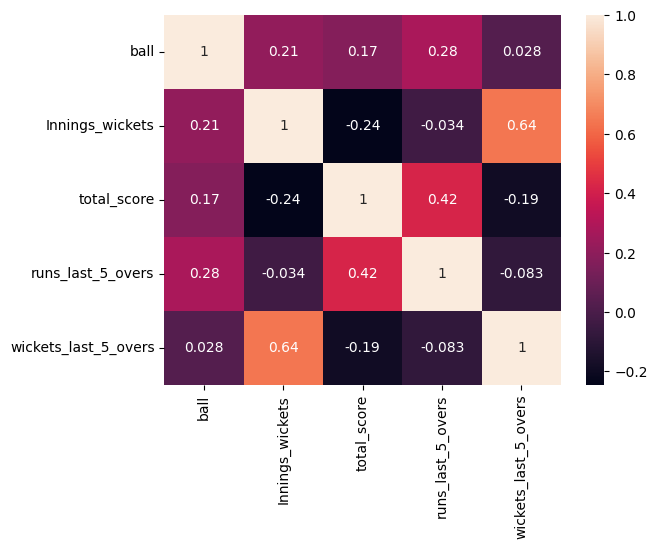

In [17]:
from seaborn import heatmap
numerical_world_df = world_df.select_dtypes(include=['int64', 'float64', 'int32'])
heatmap(data=numerical_world_df.corr(), annot=True)

## **NOTE:** The above Data cleaning Process takes a lot of time so if trying to test the model directly start the execution from **_`world_df2`_**.
> I stored the cleaned data as **_`world_cup_data_train.csv`_**. So the above can be skipped and directly start the training an modelling of the data.

In [18]:
# Save the cleaned data as CSV
world_df.to_csv(f"world_cup_data_train.csv", index=False)

> Load the Cleaned Data directly.

In [19]:
# Load the cleaned Data.
world_df2 = pd.read_csv('world_cup_data_train.csv', low_memory=False)

In [20]:
world_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927972 entries, 0 to 927971
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ball                  927972 non-null  float64
 1   batting_team          927972 non-null  object 
 2   bowling_team          927972 non-null  object 
 3   innings_runs          927972 non-null  int64  
 4   Innings_wickets       927972 non-null  int64  
 5   total_score           927972 non-null  int64  
 6   runs_last_5_overs     927972 non-null  float64
 7   wickets_last_5_overs  927972 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 56.6+ MB


## **5. Data Preprocessing and Encoding**
> The training data cannot be fed directly to the system as there are categorical as well as numerical data together. Moreover, it is efficient when the model is trained using the encoded numerical data types.

### **5.1. Performing Label Encoding**
> The Categorical Data features Batting Team and Bowling Team are to be converted into the Numerical data using **_One Hot Encoder_**.

In [21]:
# Encoding the data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
for col in ['batting_team', 'bowling_team']:
    world_df2[col] = le.fit_transform(world_df2[col])

world_df2.head()

,ball,batting_team,bowling_team,innings_runs,Innings_wickets,total_score,runs_last_5_overs,wickets_last_5_overs
0,5.1,4,1,30,1,399,26.0,1.0
1,5.2,4,1,30,1,399,22.0,1.0
2,5.3,4,1,32,1,399,24.0,1.0
3,5.4,4,1,32,1,399,24.0,1.0
4,5.5,4,1,36,1,399,23.0,1.0


### **5.2. Performing One Hot Encoding and Column Transformation**
> Applying Transformations on all the final features.

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), ['batting_team', 'bowling_team'])], remainder='passthrough')

world_array = columnTransformer.fit_transform(world_df2)

# Convert the sparse matrix to an array
world_array = world_array.toarray()

print(world_array.shape)

# Get the feature names after transformation from the encoder
encoder_feature_names = list(columnTransformer.named_transformers_['encoder'].get_feature_names_out(input_features=['batting_team', 'bowling_team']))

# Combine the encoder feature names with the remaining feature names
feature_names = encoder_feature_names + ['ball', 'innings_runs', 'Innings_wickets', 'total_score', 'runs_last_5_overs', 'wickets_last_5_overs']

print(feature_names)


(927972, 30)
['batting_team_0', 'batting_team_1', 'batting_team_2', 'batting_team_3', 'batting_team_4', 'batting_team_5', 'batting_team_6', 'batting_team_7', 'batting_team_8', 'batting_team_9', 'batting_team_10', 'batting_team_11', 'bowling_team_0', 'bowling_team_1', 'bowling_team_2', 'bowling_team_3', 'bowling_team_4', 'bowling_team_5', 'bowling_team_6', 'bowling_team_7', 'bowling_team_8', 'bowling_team_9', 'bowling_team_10', 'bowling_team_11', 'ball', 'innings_runs', 'Innings_wickets', 'total_score', 'runs_last_5_overs', 'wickets_last_5_overs']


### **5.3. Save the Numpy Array in a new DataFrame with transformed columns**
> Now finally the data is ready for training, save the data into seperate **DataFrame `df`**


>**_NOTE:_** After apply transformations, total number of features in Training Data are **_30_**.

In [23]:
df = pd.DataFrame(world_array, columns=feature_names)

In [24]:
# Encoded Data
df.head()

,batting_team_0,batting_team_1,batting_team_2,batting_team_3,batting_team_4,batting_team_5,batting_team_6,batting_team_7,batting_team_8,batting_team_9,...,bowling_team_8,bowling_team_9,bowling_team_10,bowling_team_11,ball,innings_runs,Innings_wickets,total_score,runs_last_5_overs,wickets_last_5_overs
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.1,30.0,1.0,399.0,26.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.2,30.0,1.0,399.0,22.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.3,32.0,1.0,399.0,24.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.4,32.0,1.0,399.0,24.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.5,36.0,1.0,399.0,23.0,1.0


## **6. Model Building**
> Now that the Training Data is ready the Model developement precess can be initialised.

### **6.1. Prepare Train and Test Data**
> The Targeted Feature (Feature to be predicted) is **_`Total Score`_**. So, making it the prediction label.

In [25]:
features = df.drop(['total_score'], axis=1)
labels = df['total_score']

> **Spliting the Training Data into _`train`_ & _`test`_**.

> **_NOTE:_** Here I considered the default Spliting ratio of **_`80:20`_** between **_`train:test`_** respectively.

In [26]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (742377, 29)
Testing Set : (185595, 29)


### **6.2. Selecting appropiate ML Algorithms**
> First, I created a dictionary for multiple models to store.
> Then, using the **_`scikit-learn`_** library tested out various Regression Algorithms for their fitting and accuracy scores.

In [27]:
models = dict()

#### **6.2.1. Decision Tree Regressor**
A machine learning model for regression tasks that predicts continuous values by recursively partitioning the data based on features.

**Key Features:**
  - Builds a tree structure where each internal node represents a decision based on a feature.
  - Splits data to minimize the variance of the target variable within each branch.
  - Handles non-linear relationships and interactions between features.

In [28]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [29]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 99.74%
Test Score : 72.75%


In [30]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 12.608448503461837
Mean Squared Error (MSE): 1043.2580705897847
Root Mean Squared Error (RMSE): 32.29950573290224


#### **6.2.2. Linear Regression**
A linear modeling algorithm that fits a linear relationship between input features and target variable.

**Key Features:**
- Assumes a linear relationship between features and target.
- Estimates coefficients to minimize the sum of squared differences between predicted and actual values.
- Provides interpretable coefficients indicating the impact of each feature.

In [31]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [32]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 44.14%
Test Score : 44.24%


In [33]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 35.382204543950856
Mean Squared Error (MSE): 2134.9417735680945
Root Mean Squared Error (RMSE): 46.20543013075513


#### **6.2.3. Random Forest Regression**
An ensemble learning model that fits multiple decision tree regressors on various sub-samples of the dataset and averages their predictions.

**Key Features:**
- Builds a collection of decision trees to improve prediction accuracy and control overfitting.
- Each tree is trained on a random subset of data and features, enhancing robustness.
- Provides feature importance scores based on how much each feature contributes to predictions.

In [34]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [35]:
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 97.91%
Test Score : 86.41%


In [36]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.285272015843026
Mean Squared Error (MSE): 520.231758532965
Root Mean Squared Error (RMSE): 22.808589577897294


### **6.3. Best Model**
> Out of the above models, lets plot the accuracies of them to know the best model for prediction of accurate scores.

<BarContainer object of 3 artists>

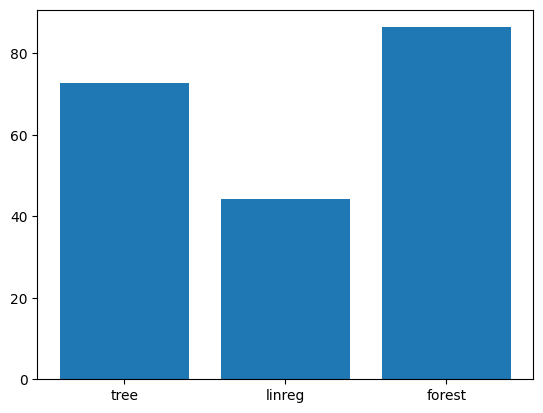

In [37]:
import matplotlib.pyplot as plt

model_names = list(models.keys())
accuracy = list(map(float, models.values()))

# creating the bar plot
plt.bar(model_names, accuracy)

From above, we can see that **Random Forest** performed the best, followed by **Decision Tree**. So we will be choosing Random Forest for the final model.

## **7. Predictions**
> Create a function **_`score_predict`_**, which creates a **_`numpy prediction array`_** out of the input features.

In [38]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5_overs, wickets_last_5_overs, model=forest):
    prediction_array = []
  # Batting Team
    if batting_team == 'Afghanistan':
        prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0,0,0]
    elif batting_team == 'Australia':
        prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0,0,0]
    elif batting_team == 'Bangladesh':
        prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0,0,0]
    elif batting_team == 'England':
        prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0,0,0]
    elif batting_team == 'India':
        prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0,0,0]
    elif batting_team == 'Ireland':
        prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0,0,0]
    elif batting_team == 'New Zealand':
        prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0,0,0]
    elif batting_team == 'Pakistan':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0,0,0]
    elif batting_team == 'South Africa':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0,0,0]
    elif batting_team == 'Sri Lanka':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1,0,0]
    elif batting_team == 'West Indies':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,0,1,0]
    elif batting_team == 'Zimbabwe':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,0,0,1]
  # Bowling Team
    if bowling_team == 'Afghanistan':
        prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0,0,0]
    elif bowling_team == 'Australia':
        prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0,0,0]
    elif bowling_team == 'Bangladesh':
        prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0,0,0]
    elif bowling_team == 'England':
        prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0,0,0]
    elif bowling_team == 'India':
        prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0,0,0]
    elif bowling_team == 'Ireland':
        prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0,0,0]
    elif bowling_team == 'New Zealand':
        prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0,0,0]
    elif bowling_team == 'Pakistan':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0,0,0]
    elif bowling_team == 'South Africa':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0,0,0]
    elif bowling_team == 'Sri Lanka':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1,0,0]
    elif bowling_team == 'West Indies':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,0,1,0]
    elif bowling_team == 'Zimbabwe':
        prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,0,0,1]

    prediction_array = prediction_array + [overs, runs, wickets, runs_last_5_overs, wickets_last_5_overs]
    prediction_array = np.array([prediction_array])
    pred = model.predict(prediction_array)
    return int(round(pred[0]))

### **7.1. Testing the Model's predictions**
#### **Test 1**
    - Batting Team : **Australia**
    - Bowling Team : **India**
    - Final Score : **217**

In [39]:
batting_team='Australia'
bowling_team='India'
score = score_predict(batting_team, bowling_team, runs=192, wickets=9, overs=26.3, runs_last_5_overs= 26, wickets_last_5_overs=1)
print(f'Predicted Score : {score} || Actual Score : 217')

Predicted Score : 211 || Actual Score : 217


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### **7.1. Testing the Model's predictions**
#### **Test 2**
- Batting Team : **India**
- Bowling Team : **Australia**
- Final Score : **399**

In [40]:
batting_team='India'
bowling_team='Australia'
score = score_predict(batting_team, bowling_team, runs=308, wickets=4, overs=36.3, runs_last_5_overs= 25, wickets_last_5_overs=1)
print(f'Predicted Score : {score} || Actual Score : 399')

Predicted Score : 395 || Actual Score : 399


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## **8.  Export Model**
> Using **_`pickle`_** library to save the model in order to use it for prediction interface.

In [41]:
import pickle
filename = "cricket_world_cup_score_prediction_model.pkl"
pickle.dump(forest, open(filename, "wb"))

## **Thus the Prediction model for T20i Cricket Matches is built. Thanks !!**


---

- **Built by - Abhishek Yeole**

- **Purpose - ICC World Cup Cricket Match Score Prediction**

- **Size of Model ~ 2.95 GB (Hashed)**

- **Interface - [Hugging Face 🤗](https://abhicodes-icc-world-cup-score-predictor.hf.space)**
